***Modelo Linear: tentar prever o consumo de um carro***

*descrição:*

* mpg: milhas por galão (medida de consumo dos EUA, como km/L), nossa variável alvo
* cylinders: número de cinlindros do motor
* displacement: deslocamento do motor, em polegadas cúbicas
* horsepower: potência do carro, em HP
* weight: peso do carro, em libras
* acceleration: tempo, em segundos, para acelerar de 0 a 60 mph (milhas por hora)
* model year: ano de fabricação do carro
* origin: região da origem do carro (1 - Americano / 2 - Europeu / 3 - Asiático)
* car name: nome do carro

--------------------------------------------------------------------------------------------------

In [162]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [163]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [164]:
dataset = '/workspaces/2025-2-minf-0701-projeto-Gavury/src/dataset/Carros - Página1.csv'

cdata = pd.read_csv(dataset)
cdata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,115,70,1,buick skylark 320
2,18,8,318,150,3436,11,70,1,plymouth satellite
3,16,8,304,150,3433,12,70,1,amc rebel sst
4,17,8,302,140,3449,105,70,1,ford torino


--------------------------------------------------------------------------------------------------

Tratamento de dados

In [165]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           392 non-null    int64 
 1   cylinders     392 non-null    int64 
 2   displacement  392 non-null    int64 
 3   horsepower    392 non-null    int64 
 4   weight        392 non-null    int64 
 5   acceleration  392 non-null    int64 
 6   model year    392 non-null    int64 
 7   origin        392 non-null    int64 
 8   car name      392 non-null    object
dtypes: int64(8), object(1)
memory usage: 27.7+ KB


--------------------------------------------------------------------------------------------------

***Normalização***

In [166]:
def zscore(X):
    # 1. Calcule a média de cada coluna
    mean_by_column = np.mean(X, axis=0)
    
    # 2. Calcule o desvio padrão de cada coluna
    std_by_column = np.std(X, axis=0)

    # 3. Evite a divisão por zero em colunas com desvio padrão zero
    # Substitua desvios padrão zero por 1 para evitar problemas
    # A transformação (x - mean) / 1 resultará em (x - mean), que será 0,
    # já que x e mean são iguais quando o desvio padrão é zero.
    std_by_column[std_by_column == 0] = 1

    # 4. Padronize os dados aplicando a fórmula
    X_scaled = (X - mean_by_column) / std_by_column
    

    return X_scaled, mean_by_column, std_by_column

In [167]:
cd = cdata.drop(['car name', "origin"], axis=1)

cd, cd_mean, cd_std = zscore(cd)
scaled_values, mean_values, std_values = zscore(cd)

df_scaled = pd.DataFrame(scaled_values, columns=cd.columns)

# Variáveis independentes (características)
X = cd[['horsepower', 'displacement', 'mpg']]


# Variável dependente (alvo)
y = cd['weight']

In [168]:
y.head()


0    0.620540
1    0.843334
2    0.540382
3    0.536845
4    0.555706
Name: weight, dtype: float64

---------------------------------------------------------------------------------------------------

**Divisão de dados**

In [169]:
data = pd.concat([X, y], axis=1)

# 2. Embaralhe (randomize) a ordem das linhas
data_shuffled = data.sample(frac=1, random_state=1).reset_index(drop=True)

# 3. Calcule o tamanho dos conjuntos de treino e teste
test_size = 0.3
total_rows = len(data_shuffled)
train_split = int(total_rows * (1 - test_size))

# 4. Divida os dados embaralhados
train_data = data_shuffled.iloc[:train_split]
test_data = data_shuffled.iloc[train_split:]

# 5. Separe novamente as variáveis X e y
X_train = train_data.drop('weight', axis=1)
y_train = train_data['weight']

X_test = test_data.drop('weight', axis=1)
y_test = test_data['weight']

# Verifique o tamanho de cada conjunto para confirmar
print(f"Tamanho do conjunto de treino (X_train): {len(X_train)}")
print(f"Tamanho do conjunto de teste (X_test): {len(X_test)}")


Tamanho do conjunto de treino (X_train): 274
Tamanho do conjunto de teste (X_test): 118


In [170]:
X_train.head()

,horsepower,displacement,mpg
0,-0.194303,-0.687018,-0.668909
1,-0.766593,-0.893167,-0.620796
2,-0.766593,-0.794574,1.744802
3,0.195895,-0.678055,-0.700985
4,-0.974698,-0.946944,-0.548625


In [171]:
X_test.head()

,horsepower,displacement,mpg
274,1.626621,1.822619,-0.757118
275,0.143869,0.567801,-0.717023
276,-0.766593,-0.507758,-0.652872
277,0.638120,0.944246,0.557994
278,-0.480448,-0.669092,-0.684947


--------------------------------------------------------------------------------------------------

Treino de Modelo Linear

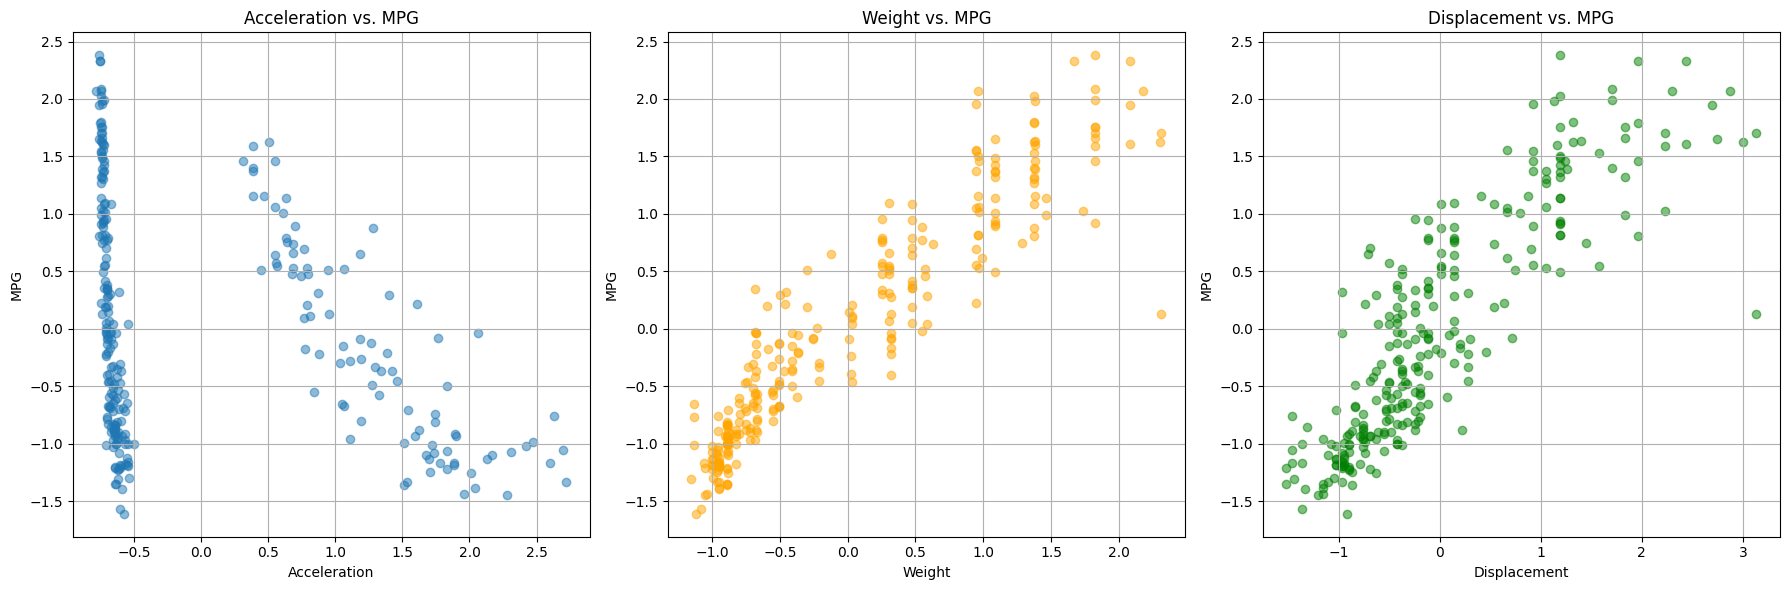

In [172]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Plotando o primeiro gráfico (acceleration vs. mpg) ---
axes[0].scatter(X_train['mpg'], y_train, alpha=0.5)
axes[0].set_xlabel('Acceleration')
axes[0].set_ylabel('MPG')
axes[0].set_title('Acceleration vs. MPG')
axes[0].grid(True) # Adiciona uma grade

# --- Plotando o segundo gráfico (weight vs. mpg) ---
axes[1].scatter(X_train['displacement'], y_train, alpha=0.5, color='orange')
axes[1].set_xlabel('Weight')
axes[1].set_ylabel('MPG')
axes[1].set_title('Weight vs. MPG')
axes[1].grid(True)

# --- Plotando o terceiro gráfico (displacement vs. mpg) ---
axes[2].scatter(X_train['horsepower'], y_train, alpha=0.5, color='green')
axes[2].set_xlabel('Displacement')
axes[2].set_ylabel('MPG')
axes[2].set_title('Displacement vs. MPG')
axes[2].grid(True)

# Ajusta o espaçamento entre os subplots para evitar sobreposição
plt.tight_layout()

# Exibe todos os gráficos
plt.show()

In [173]:
from src.optimizers import SteepestDescentMethod
from src.models import LinearModel
from src.algorithms import PLA 
from src.stop_criteria import CompositeStopCriteria, MaxIterationStopCriteria, MinErrorStopCriteria
from src.analyzers import PlotterAlgorithmObserver

In [174]:
def plot_strategy(optimizer):
    model = LinearModel()
    alg = PLA(optimizer, model)
    min_error = 0.25
    max_iteration = 100000

    stop_criteria = CompositeStopCriteria()
    stop_criteria.add(MinErrorStopCriteria(min_error=min_error))
    stop_criteria.add(MaxIterationStopCriteria(max_iteration=max_iteration))

    analyzer = PlotterAlgorithmObserver()
    alg.add(analyzer)

    y_linha = y_train.values.reshape(-1,1)
    alg.fit(X_train, y_linha, stop_criteria)

    final_iteration = max(analyzer.iterations)
    print(f"Final Iteration: {final_iteration}")
    print(f"Final Error: {analyzer.errors[-1]}")

    feature_names = ['displacement', 'horsepower', 'mpg']
    
    selected_indices = [X_train.columns.get_loc(col) for col in feature_names]
   
    filtered_weights = [[w[i] for i in selected_indices] for w in analyzer.weights]

    print(f"Final Weights (selected features): {filtered_weights[-1]}")

    # plota apenas os pesos filtrados
    analyzer.plot(weights=filtered_weights)

    return alg


Final Iteration: 30716
Final Error: [[0.25000514]]
Final Weights (selected features): [array([0.30217578]), array([0.00209884]), array([0.32798168])]


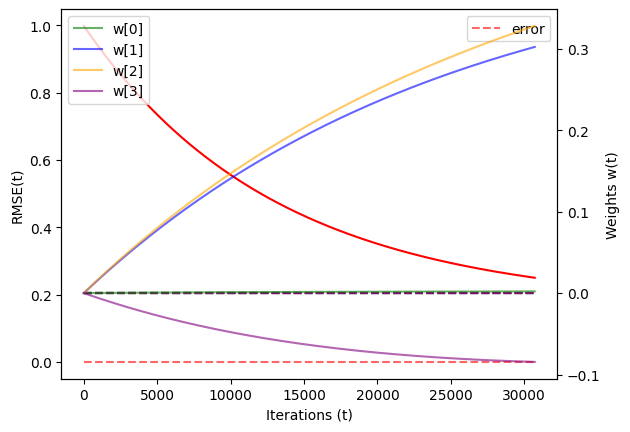

In [175]:
learning_rate = 0.00001
optimizer = SteepestDescentMethod(learning_rate)
agl = plot_strategy(optimizer)

--------------------------------------------------------------------------------------------------

***Testes***

In [176]:
def pla_predict(X, w):
    X_bias = np.hstack([X, np.ones((X.shape[0], 1))])  # adiciona bias
    scores = X_bias @ w
    return scores

In [177]:
def evaluate_regression(alg, X_train, y_train, X_test, y_test):
    w = alg.model.w
    y_pred_train = pla_predict(X_train, w)
    y_pred_test  = pla_predict(X_test, w)

    # Converte Series para NumPy
    y_train_np = y_train.values if hasattr(y_train, "values") else y_train
    y_test_np  = y_test.values  if hasattr(y_test, "values")  else y_test

    mse_train = np.mean((y_pred_train.flatten() - y_train_np.flatten())**2)
    mse_test  = np.mean((y_pred_test.flatten()  - y_test_np.flatten())**2)

    mae_train = np.mean(np.abs(y_pred_train.flatten() - y_train_np.flatten()))
    mae_test  = np.mean(np.abs(y_pred_test.flatten()  - y_test_np.flatten()))

    print("== Resultados (Regressão) ==")
    print(f"MSE Treino: {mse_train:.4f} | MAE Treino: {mae_train:.4f}")
    print(f"MSE Teste:  {mse_test:.4f} | MAE Teste:  {mae_test:.4f}")


In [178]:

evaluate_regression(agl, X_train, y_train, X_test, y_test)

== Resultados (Regressão) ==
MSE Treino: 0.8102 | MAE Treino: 0.7240
MSE Teste:  0.8670 | MAE Teste:  0.7323


In [179]:
def debug_predictions(alg, X, y, mean_y=None, std_y=None, n=10):
  
    w = alg.model.w
    y_pred = pla_predict(X, w)

    # Desnormaliza se necessário
    if mean_y is not None and std_y is not None:
        y_pred = y_pred * std_y + mean_y
        y_real = y * std_y + mean_y
    else:
        y_real = y

    print("Primeiras comparações:")
    for i in range(min(n, len(y))):
        if abs(y_pred[i] - y_real[i]) < 2000:
          print(f"Real: {y_real[i]}  |  Previsto: {y_pred[i]}")


In [180]:
debug_predictions(agl, X_train, y_train, mean_y=cd_mean['weight'], std_y=cd_std['weight'])

Primeiras comparações:
Real: 2506.0  |  Previsto: [2543.34558991]
Real: 2171.0  |  Previsto: [2502.86905211]
Real: 2350.0  |  Previsto: [3186.32971986]
Real: 2868.0  |  Previsto: [2537.41334364]
Real: 1995.0  |  Previsto: [2508.79330508]
Real: 2075.0  |  Previsto: [3188.26697964]
Real: 2189.0  |  Previsto: [2493.60014131]
Real: 4237.0  |  Previsto: [2980.64177384]
Real: 2288.0  |  Previsto: [2501.42528323]
Real: 2290.0  |  Previsto: [3183.89318702]
